# 강남대학교 데이터사이언스 201804217 유제우 (기말고사)

# 1.웹크롤링을 통하여 관심주제에 대한 데이터를 수집하고 수집한 내용과 코드 설명을 병행하여 제시하세요.

In [1]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# 여기까지 실행 후 "런타임 다시 시작..." 실행 (이 부분은 실행할 필요 없음)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


## 쇼핑몰 품목 리뷰 크롤링하기
- 크롤링 출처: https://www.11st.co.kr/products/122630278?trTypeCd=21&trCtgrNo=585021
- 상품 명: 휴대폰 케이스
- 선정 이유: 누구나 휴대폰 케이스는 케이스가 더러워졌을때 주기적으로 갈아주기 때문에 관심이 있는 대상이 된다고 생각했다. 선정에 있어서 가장 중요한것은 리뷰의 수 너무 적지 않게 있었고, 각 리뷰댓글마다 평점또한 부여되어 있어 점수별로 긍정과 부정을 나누기 매우 용이할거라 생각했다.

In [1]:
# 리뷰 평점을 제외한 본문만 크롤링하여 review에 담는 내용이다

import os,sys
from bs4 import BeautifulSoup
import urllib.parse
import urllib.request
import pandas as pd

review = ""
page = 1

while page <= 150:   # 페이지당 10개의 리뷰가 크롤링 되는데, 총 150페이지 까지 크롤링 하겠다는 코드이다.
  web_url = "http://deal.11st.co.kr/product/SellerProductDetail.tmall?method=getProductReviewList&prdNo=122630278&page="+str(page)+"&pageTypCd=first&reviewDispYn=Y"
  with urllib.request.urlopen(web_url) as response:
    html 		= response.read()	
    soup 		= BeautifulSoup(html, 'html.parser')
    for tag in soup.select('a#reviewContTxt'):
      review += tag.text.strip()
      review += "\n\n"    
    page += 1


print(review)


보석이 화려하고 이쁘나 울퉁불퉁 하여 딱딱한 바닥에 떨어뜨리기라도하면 금방 깨질듯해요.. 조심히 사용해야죠

빛에따라 색이 변하고 가볍고 이뻐요

귀여운 그림 아이가 참 좋아하는데 끼우고 벗겨내는게 여간 힘든게 아니네요 ㅠㅠ

넘기대했나바여  넘비싸단느낌도들고 핸폰옷갈아입혔는데도티도안나고 물론 제가선택잘못이겠지만 제가구매한건안이쁘네요 다른거구입하려해도 비싸서걍씁니다

예쁘고 튼튼해서 좋은데 아쉬운 점은 생각보다 무겁네요.안그래도 폰이 큰데 좀 오래 들고 있으면 손목이 아프고 두께감도 좀 있어요

케이스는 괜찮은데 가격이 너무 비싼거 같아요 ㅠㅠ

아이가 너무 좋아합니다. 반짝반짝~

예뻐요. 자동충전이 안될꺼같아서  걱정이긴한데..만족합니다

세상에...색상 왜 고민했나싶을만큼 너무 예뻐서 말이 안나오네요!ㅠㅠㅠ 솔직히 이정도 퀄리티에 이 가격이면 완전 득템한 것같은 기분이예요.일단 처음에 이 케이스 너무 예뻐서 당연히 아이폰만 팔겠지했는데 갤럭시도 있다는 것 자체부터 감동이였구용...ㅠㅠ♡ 감도 보들보들 마감처리도 깔끔하니 너무나 맘에 듭니다! 폰이 더더 고급스러워졌어요!ㅎㅎㅎ 배송도 총알배송입니당

친구랑 같이 샀는데 로즈핑크 폰색상에는 B가 훨씬 잘 맞는것같아용! 그치만 A도 넘 이뻐용 솔직히 이정도 퀄리티에 이 가격이면 완전 득템한 것같은 기분이예요.일단 처음에 이 케이스 너무 예뻐서 당연히 아이폰만 팔겠지했는데 갤럭시도 있다는 것 자체부터 감동이였구용...ㅠㅠ♡ 감도 보들보들 마감처리도 깔끔하니 너무나 맘에 듭니다! 폰이 더더 고급스러워졌어요!ㅎㅎㅎ 배송도 총알배송입니당

전 심플한 하드나 젤리케이스를 좋아하고, 케이스에 실증이 빨리 나는편이라 구매를 자주하는 편입니다. 그러나 성격이 그다지 여성스럽지 않다보니 꽃무늬는 구매한적 없었어요~근데 이상하게 이 케이스는 자꾸 아른거려서 한달을 고민하다 결국 구매!! 일욜에 주문하고 수욜에 수취 완료!! 보통 하드케이스는 위쪽이 다 덮혀있지 않은데 이 케이스는 다 덮혀있어서 만족!!! 무늬도 사진이랑 똑같아요

In [2]:
# 이부분은 리뷰에서 평점부분만 크롤링하여 score에 담는 내용이다.

import os,sys
from bs4 import BeautifulSoup
import urllib.parse
import urllib.request

score = ""
page = 1

while page <= 150:  # 페이지당 10개의 리뷰가 크롤링 되는데, 총 150페이지 까지 크롤링 하겠다는 코드이다.
  web_url = "http://deal.11st.co.kr/product/SellerProductDetail.tmall?method=getProductReviewList&prdNo=122630278&page="+str(page)+"&pageTypCd=first&reviewDispYn=Y"
  with urllib.request.urlopen(web_url) as response:
    html 		= response.read()	
    soup 		= BeautifulSoup(html, 'html.parser')
    for tag in soup.select('div.bbs_top'):
      score += tag.text.strip()
      score += "\n\n"
    page += 1

print(score)

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 3개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 1개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 1개

판매자 평점 별5개 중 1개

판매자 평점 별5개 중 3개

판매자 평점 별5개 중 3개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 1개

판매자 평점 별5개 중 3개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 2개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 3개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 2개

판매자 평점 별5개 중 3개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 2개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 1개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 2개

판매자 평점 별5개 중 3개

판매자 평점 별5개 중 1개

판매자 평점 별5개 중 2개

판매자 평점 별5개 중 3개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 5개

판매자 평점 별5개 중 1개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 2개

판매자 평점 별5개 중 4개

판매자 평점 별5개 중 5

In [3]:
# 앞에서 크롤링한 review를 텍스트파일에 넣는 과정이다.

with open("review.txt", "w") as f:
  f.write(review)

In [4]:
# 앞에서 크롤링한 score를 텍스트파일에 넣는 과정이다.

with open("score.txt", "w") as a:
  a.write(score)

#2.Konlpy 또는 정규표현식(re) 라이브러리를 이용하여 위에서 수집한 택스트 데이터에 대하여 전처리를 하고 적용한 절차와 코드를 설명하세요. 

In [5]:
!pip install konlpy  

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 448 kB 38.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


## 전처리 후 토큰과 코퍼스 만들기

In [6]:
# 구글드라이브 마운트시키기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 위에서 만든 review.txt, score.txt파일이 드라이브 data폴더에 잘 들어갔는지 확인하기
import os
data_dir = "/content/drive/MyDrive/data"
os.listdir(data_dir)

['example.py',
 'test.txt',
 'kowiki',
 'corpus',
 '.ipynb_checkpoints',
 'A.txt',
 'news.txt',
 'myproject',
 'movie_comment.csv',
 'result.txt',
 'mydata',
 'chromedriver.exe',
 'review.txt1',
 'business_anlytics_worldcloud.png',
 'review.txt',
 'score.txt',
 '2BarPlot.png']

In [8]:
# 경로 설정하기
os.chdir("/content/drive/MyDrive/data")
os.getcwd()

'/content/drive/MyDrive/data'

### 텍스트파일 내용 확인하기

In [9]:
# review.txt의 내용 확인하기

docs, doc = [], []

with open("review.txt", 'r') as f:
    for i, line in enumerate(f):
            line = line.strip()
            if line:
                doc.append(line)
            else:
                if doc:
                    docs.append(doc)
                doc = []
          
docs[:5]

[['보석이 화려하고 이쁘나 울퉁불퉁 하여 딱딱한 바닥에 떨어뜨리기라도하면 금방 깨질듯해요.. 조심히 사용해야죠'],
 ['빛에따라 색이 변하고 가볍고 이뻐요'],
 ['귀여운 그림 아이가 참 좋아하는데 끼우고 벗겨내는게 여간 힘든게 아니네요 ㅠㅠ'],
 ['넘기대했나바여  넘비싸단느낌도들고 핸폰옷갈아입혔는데도티도안나고 물론 제가선택잘못이겠지만 제가구매한건안이쁘네요 다른거구입하려해도 비싸서걍씁니다'],
 ['예쁘고 튼튼해서 좋은데 아쉬운 점은 생각보다 무겁네요.안그래도 폰이 큰데 좀 오래 들고 있으면 손목이 아프고 두께감도 좀 있어요']]

In [10]:
# score.txt의 내용 확인하기

docs1, doc1 = [], []

with open("score.txt", 'r') as f:
    for i, line in enumerate(f):
            line = line.strip()
            if line:
                doc1.append(line)
            else:
                if doc1:
                    docs1.append(doc1)
                doc1 = []
          
docs1[:5]

# 우리가 필요한것은 평점이 몇점인지 정확히 숫자 1개만 필요하다 예를들어 5점중 1점이면 숫자 1만 필요하다.
# 따라서 리스트 내용을 수정해 줄 필요가 있다.

[['판매자 평점 별5개 중 4개'],
 ['판매자 평점 별5개 중 5개'],
 ['판매자 평점 별5개 중 4개'],
 ['판매자 평점 별5개 중 3개'],
 ['판매자 평점 별5개 중 4개']]

In [11]:
# 평점과 리뷰내용을 합치는 과정이다.

for i in range(len(docs)):
  docs1[i] += docs[i]

docs1[:3]

# 차후 진행될 로지스틱 회귀분석을 위해 평점 부분을 1~5로 간단한 숫자만 나타나게 바꿔줘야 한다.

[['판매자 평점 별5개 중 4개',
  '보석이 화려하고 이쁘나 울퉁불퉁 하여 딱딱한 바닥에 떨어뜨리기라도하면 금방 깨질듯해요.. 조심히 사용해야죠'],
 ['판매자 평점 별5개 중 5개', '빛에따라 색이 변하고 가볍고 이뻐요'],
 ['판매자 평점 별5개 중 4개', '귀여운 그림 아이가 참 좋아하는데 끼우고 벗겨내는게 여간 힘든게 아니네요 ㅠㅠ']]

In [12]:
# 평점을 보면 단순히 1~5와 같이 숫자로 입력되어 있는게 아니라, '판매자 평점~~'와 같이 문장으로 나타나있다.
# docs1[i][0]은 각 인덱스마다 평점의 문장이 있는 부분을 의미하고, docs1[i][0][-2]는 평점의 문장 부분에서
# 1~5와 같이 단순히 숫자로 되어있는 부분을 의미한다. 
# docs1[i][0] = int(docs1[i][0][-2]) 이 코드의 의미는, 각 인덱스별로 평점이 있는 문장을 숫자로만 나타낸 평점으로 바꾸겠다는 의미이다.  


for i in range(len(docs1)):
  docs1[i][0] = int(docs1[i][0][-2])

# 잘 변경되었는지 확인하기
docs1[:5]

[[4, '보석이 화려하고 이쁘나 울퉁불퉁 하여 딱딱한 바닥에 떨어뜨리기라도하면 금방 깨질듯해요.. 조심히 사용해야죠'],
 [5, '빛에따라 색이 변하고 가볍고 이뻐요'],
 [4, '귀여운 그림 아이가 참 좋아하는데 끼우고 벗겨내는게 여간 힘든게 아니네요 ㅠㅠ'],
 [3,
  '넘기대했나바여  넘비싸단느낌도들고 핸폰옷갈아입혔는데도티도안나고 물론 제가선택잘못이겠지만 제가구매한건안이쁘네요 다른거구입하려해도 비싸서걍씁니다'],
 [4,
  '예쁘고 튼튼해서 좋은데 아쉬운 점은 생각보다 무겁네요.안그래도 폰이 큰데 좀 오래 들고 있으면 손목이 아프고 두께감도 좀 있어요']]

In [13]:
# 전체 문서의 수 확인하기, i번째 문서의 센텐스 수 확인하기

i = int(input("몇 번째 문장? "))
print("전체 문서의 수: ", len(docs))
print(f"{i}번째 문서의 센텐스 수: {len(docs[i])}") 

# 해석: 총 669개의 댓글이 크롤링된 것을 알 수 있다.

몇 번째 문장? 3
전체 문서의 수:  669
3번째 문서의 센텐스 수: 1


### 형태소 분석기 사용하기


In [14]:
import konlpy
okt = konlpy.tag.Okt()

In [15]:
# 하나의 문서 형태소 분석기로 형태소 추출하기
print(okt.morphs(" ".join(docs[0])))
print(okt.nouns(" ".join(docs[0])))

['보석', '이', '화려하고', '이쁘나', '울퉁불퉁', '하여', '딱딱한', '바닥', '에', '떨어뜨리', '기라', '도하', '면', '금방', '깨질듯', '해', '요', '..', '조심', '히', '사용', '해야죠']
['보석', '바닥', '도하', '금방', '해', '조심', '사용']


In [16]:
print(okt.pos(review))
print(okt.tagset)

[('보석', 'Noun'), ('이', 'Josa'), ('화려하고', 'Adjective'), ('이쁘나', 'Adjective'), ('울퉁불퉁', 'Adverb'), ('하여', 'Verb'), ('딱딱한', 'Adjective'), ('바닥', 'Noun'), ('에', 'Josa'), ('떨어뜨리', 'Verb'), ('기라', 'Verb'), ('도하', 'Noun'), ('면', 'Josa'), ('금방', 'Noun'), ('깨질듯', 'Verb'), ('해', 'Noun'), ('요', 'Josa'), ('..', 'Punctuation'), ('조심', 'Noun'), ('히', 'Adverb'), ('사용', 'Noun'), ('해야죠', 'Verb'), ('\n\n', 'Foreign'), ('빛', 'Noun'), ('에', 'Josa'), ('따라', 'Verb'), ('색', 'Noun'), ('이', 'Josa'), ('변하고', 'Adjective'), ('가볍고', 'Adjective'), ('이뻐요', 'Adjective'), ('\n\n', 'Foreign'), ('귀여운', 'Adjective'), ('그림', 'Noun'), ('아이', 'Noun'), ('가', 'Josa'), ('참', 'Verb'), ('좋아하는데', 'Adjective'), ('끼우고', 'Verb'), ('벗겨내는게', 'Verb'), ('여간', 'Noun'), ('힘든게', 'Adjective'), ('아니네요', 'Adjective'), ('ㅠㅠ', 'KoreanParticle'), ('\n\n', 'Foreign'), ('넘', 'Verb'), ('기대했나', 'Adjective'), ('바', 'Noun'), ('여', 'Josa'), ('넘', 'Verb'), ('비싸단', 'Adjective'), ('느낌', 'Noun'), ('도', 'Josa'), ('들고', 'Verb'), ('핸폰옷', 'Noun'), ('갈아', 'Adve

### Data준비

In [17]:
# DataFrame형식으로 바꾸는 작업이다.
# 중간에 평점만 입력하고 내용은 입력하지 않은 
# 리뷰가 많아서 None값을 제거하는 과정이다.

col_names = ["Score", "Review"]
df = pd.DataFrame(docs1, columns=col_names).dropna()
df
# 해석: Score는 평점, Review는 리뷰

,Score,Review
0,4,보석이 화려하고 이쁘나 울퉁불퉁 하여 딱딱한 바닥에 떨어뜨리기라도하면 금방 깨질듯해...
1,5,빛에따라 색이 변하고 가볍고 이뻐요
2,4,귀여운 그림 아이가 참 좋아하는데 끼우고 벗겨내는게 여간 힘든게 아니네요 ㅠㅠ
3,3,넘기대했나바여 넘비싸단느낌도들고 핸폰옷갈아입혔는데도티도안나고 물론 제가선택잘못이겠...
4,4,예쁘고 튼튼해서 좋은데 아쉬운 점은 생각보다 무겁네요.안그래도 폰이 큰데 좀 오래 ...
...,...,...
664,5,굿
665,4,굿
666,5,ㅂ
667,5,.


In [18]:
# 전체 데이터와 결측치 확인
print(df.shape)
# df.isnull().sum()
df.info()

# 전체 데이터는 669개, 2개의 칼럼(Score, Review)으로 이루어져있는 데이터

(669, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 668
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Score   669 non-null    int64 
 1   Review  669 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


5    315
4    175
3     90
1     51
2     38
Name: Score, dtype: int64


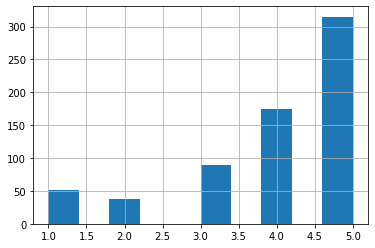

In [19]:
# 점수별 현황
print(df['Score'].value_counts())
df['Score'].hist()

# 해석: 5점과 4점은 상대적으로 많음, 부정적인 데이터는 상대적으로 매우 적음 따라서 불균형

In [20]:
# 점수를 기준으로 긍정(4,5)과 부정(1~3)으로 변환
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['Score'].apply(lambda x: rating_to_label(x))

### 한국어 텍스트 데이터 전처리

In [21]:
# 긍정 및 부정평가 댓글 수 
df["y"].value_counts()

# 해석: 1은 긍정, 0은 부정

1    490
0    179
Name: y, dtype: int64

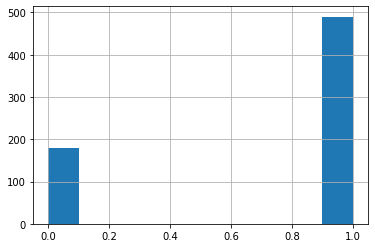

In [23]:
# 0은 부정으로 약 180개, 1은 긍정으로 490개가 있다는것을 알 수 있다.
# 대략 310개 차이로 긍정과 부정의 개수가 불균형하다.

df['y'].hist()

In [24]:
# 인터넷에서 제공하는 한글 불용어 사전 다운
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
# stopwords[:10]
# 형태 조정, 특별한 용어 추가 불용어 
stopwords=[x for x in stopwords]

stopwords.append("제대로")
stopwords.append("ㅂ니다")

stopwords[:5]
# 긍정과 부정을 판별하는데에 의미없는 단어이기 때문에 빼주는 작업을 해주는게 좋다.

[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어']]

In [25]:
# 문서별로 한글 형태소 분석기로 전처리를 한후 형태소만 추출하고, Stop Words는 제거하기
# df로 말뭉치로 만들기

import konlpy
# tagger = konlpy.tag.Mecab()
tagger = konlpy.tag.Okt()

tokens=[]
corpus =[]
# stopwords = ['(,', '것', '계','간의']

for i, sentence in enumerate(df['Review']):
    para = tagger.nouns(sentence)
    para = [x for x in para if x not in stopwords] # 불용어 제거
    para = [x for x in para if len(x) > 1]
    tokens.append(para)
    corpus.append(' '.join(para))

print(corpus[:5])
print(tokens[:5])

['보석 바닥 도하 금방 조심 사용', '', '그림 아이 여간', '느낌 핸폰옷 안나 선택 구매 건안 거구 해도', '생각 손목 두께']
[['보석', '바닥', '도하', '금방', '조심', '사용'], [], ['그림', '아이', '여간'], ['느낌', '핸폰옷', '안나', '선택', '구매', '건안', '거구', '해도'], ['생각', '손목', '두께']]


# 3.긍정과 부정에 대한 워드크라우딩 결과를 비교 분석, wordcloud 라이브러리로 시각화하여 결과를 설명하세요.

## 탐색적 데이터 분석(EDA)**

In [26]:
# 긍정 평가와 부정평가 토큰을 분리하여 저장 
print(df[:5])
print(df.loc[df['y']==0,][:5])
tokens_p, tokens_n = [],[]
for i, token in enumerate(tokens):
  # if i>5:
  #   break
  if df['y'].values[i]== 1:  # 주의 : df['y'][i] 값을 사용하면 기존 index가 참조되어서 값이 다름
    tokens_p.append(token)
  else :
    tokens_n.append(token)

print(tokens_p)
print(tokens_n)

   Score                                             Review  y
0      4  보석이 화려하고 이쁘나 울퉁불퉁 하여 딱딱한 바닥에 떨어뜨리기라도하면 금방 깨질듯해...  1
1      5                                빛에따라 색이 변하고 가볍고 이뻐요  1
2      4        귀여운 그림 아이가 참 좋아하는데 끼우고 벗겨내는게 여간 힘든게 아니네요 ㅠㅠ  1
3      3  넘기대했나바여  넘비싸단느낌도들고 핸폰옷갈아입혔는데도티도안나고 물론 제가선택잘못이겠...  0
4      4  예쁘고 튼튼해서 좋은데 아쉬운 점은 생각보다 무겁네요.안그래도 폰이 큰데 좀 오래 ...  1
    Score                                             Review  y
3       3  넘기대했나바여  넘비싸단느낌도들고 핸폰옷갈아입혔는데도티도안나고 물론 제가선택잘못이겠...  0
12      1  16500원의 값어치는 아닌것같아요 올블랙에 무광이 마음에 들어구매했는데 모서리 4...  0
15      1  제가 원래 어제 받엇어야되는데 주말에 사정상 오늘 받게도엇어요... 근대 받고 케이...  0
16      1  노트5 케이스는 왼쪽 부분이 저렇게 찢어진것 처럼 나온다고 하는 군요. 하드케이스는...  0
17      3  케이스 자체는 넘나 예뻐요! 근데 요즘 핸드폰 케이스들은 액정까지 감싸주는 케이스가...  0
[['보석', '바닥', '도하', '금방', '조심', '사용'], [], ['그림', '아이', '여간'], ['생각', '손목', '두께'], ['케이스', '가격'], ['아이'], ['자동', '충전', '걱정'], ['세상', '색상', '고민', '이정', '퀄리티', '가격', '이면', '완전', '득템', '기분', '일단', '처음', '케이스', '아이폰', '갤럭시', '자체', '감동', '마감',

In [27]:
# counter 함수에 넣기위한 전처리 : 토큰단위 리스트로
corpus_n, corpus_p = [], []
for token in tokens_p:
  corpus_p.append(' '.join(token))
for token in tokens_n:
  corpus_n.append(' '.join(token))
# 모든 리뷰를 긍정 부정 하나의 corpus로 합치기 
corpus_p1 = ' '.join(corpus_p).split()
corpus_n1 = ' '.join(corpus_n).split()
print(corpus_p1)

['보석', '바닥', '도하', '금방', '조심', '사용', '그림', '아이', '여간', '생각', '손목', '두께', '케이스', '가격', '아이', '자동', '충전', '걱정', '세상', '색상', '고민', '이정', '퀄리티', '가격', '이면', '완전', '득템', '기분', '일단', '처음', '케이스', '아이폰', '갤럭시', '자체', '감동', '마감', '처리', '듭니', '더더', '배송', '총알', '배송', '친구', '핑크', '색상', '이정', '퀄리티', '가격', '이면', '완전', '득템', '기분', '일단', '처음', '케이스', '아이폰', '갤럭시', '자체', '감동', '마감', '처리', '듭니', '더더', '배송', '총알', '배송', '심플', '하드', '젤리', '케이스', '케이스', '실증', '편이', '구매', '자주', '편입', '성격', '그다지', '여성', '무늬', '구매', '한적', '케이스', '자꾸', '고민', '구매', '일욜', '주문', '수욜', '수취', '완료', '보통', '하드', '케이스', '위쪽', '케이스', '만족', '무늬', '사진', '케이스', '상단', '부분', '포인트', '그닥', '신경', '사진', '보시', '케이스', '접착', '고리', '부분', '포인트', '고리', '컬러', '차이', '그게', '감점', '요인', '장식', '고리', '포인트', '엔틱', '느낌', '그냥', '컬러', '차이', '장식', '부분', '때문', '무거워', '생각', '하드', '케이스', '가득', '핫핑크', '구매', '핫핑크', '기름', '보람', '택배', '케이스', '순간', '표정', '얼핏봐', '프린터', '케이스', '그림', '생각', '케이스', '완성', '불량', '내야', '그냥', '퍼플', '프린터', '반품', '교환', '그냥', '몇개', '할랬', '사고', '색상

In [28]:
# 빈도 탐색
from collections import Counter
counter_p = Counter(corpus_p1)
counter_n = Counter(corpus_n1)
print(counter_p.most_common(10))
print(counter_n.most_common(10))

# 해석: 긍정리뷰쪽에는 케이스, 배송, 구매, 디자인 ...
# 부정리뷰쪽에는 케이스, 배송, 그냥 ...
# 긍정과 부정에서 케이스와 배송이 공통단어로 겹치는데, 각각 다른 의미로 쓰인것을 알 수 있다.
# 예를들어 긍정에선 케이스가 가볍다. 부정에선 케이스가  울퉁불퉁하다.

[('케이스', 88), ('배송', 79), ('구매', 38), ('디자인', 35), ('가격', 33), ('생각', 29), ('요요', 29), ('주문', 26), ('사은', 22), ('마음', 21)]
[('케이스', 44), ('배송', 28), ('그냥', 25), ('사진', 24), ('가격', 18), ('부분', 18), ('큐빅', 18), ('별로', 14), ('상품', 12), ('생각', 12)]


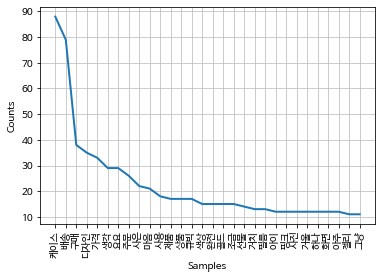

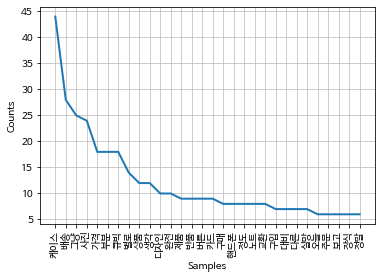

In [29]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(corpus_p1)
neg = nltk.Text(corpus_n1)
plt.rc('font', family='NanumBarunGothic') 

plt.figure(1)
pos.plot(30)

plt.figure(2)
neg.plot(30)
plt.show()

# 토픽모형에서도 문서간에 공통적으로 들어가는 단어는 가중치가 적어지죠?
# 그런것과 같이 각 긍정과 부정에서 많이쓰여진 단어가 가중치가 높아지도록 되어있습니다.

# 해석: 각 리뷰의 단어를 카운트한것의 시각화임

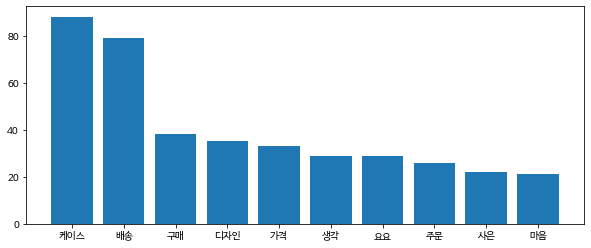

In [30]:
top_10 = counter_p.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

# counter_p => 긍정에서 많이쓰인 단어 탑10

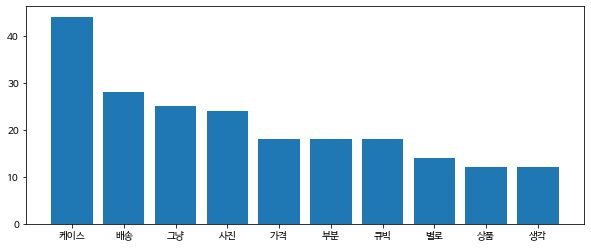

In [31]:
top_10 = counter_n.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

# # counter_n => 부정에서 많이쓰인 단어 탑10

In [37]:
# DTM 구하기, corpus 문서단위 * 단어사전 909개 매트릭스 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
print(dtm.shape)
pd.DataFrame(dtm, columns=col)

# 909는 리뷰에서 나온 여러개의 토큰 즉, 단어개수
# 669는 총 코멘트

(669, 909)


,금방,도하,바닥,보석,사용,조심,그림,아이,여간,거구,건안,구매,느낌,선택,안나,해도,핸폰옷,두께,생각,손목,가격,케이스,걱정,자동,충전,감동,갤럭시,고민,기분,더더,득템,듭니,마감,배송,색상,세상,아이폰,완전,이면,이정,...,가끔,더군다나,몇줄,별탈,볼품,엉망,대안,성능,일반,이듭,기사,사치,트림,메인,밀착,안함,옵션,라인,림보,교체,뽀용,신분증,지갑,평소,레시,용감,머무,직각,멀리,이뻐횹,딸아이,아내,에쏘,요조,맘에듬,에버,예뻐욤,땡큐,짱짱,안녕
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
665,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tf_idf = tfidf_vectorizer.fit_transform(dtm).toarray()
col = g_dictionary.token2id.keys()
print(tf_idf.shape)
pd.DataFrame(tf_idf, columns=col)

# 해석: 공통적으로 등장하는것은 가중치가 줄어들고, 유니크한 단어는 가중치 높음 

# TF-IDF는 로지스틱 회귀분석을 할때, 입력데이터로 사용한다.
# 입력데이터로 쓴다는것은 첫번째 x변수 = 금방, 두번째 x변수 = 도하 ... 이와같이
# 단어가 각각 독립변수가 되는것입니다. 따라서 독립변수가 
# 909개가 된다. 독립변수가 많으면 많을수록 복잡성에 대한 문제가 유발되기 쉽다.

(669, 909)


,금방,도하,바닥,보석,사용,조심,그림,아이,여간,거구,건안,구매,느낌,선택,안나,해도,핸폰옷,두께,생각,손목,가격,케이스,걱정,자동,충전,감동,갤럭시,고민,기분,더더,득템,듭니,마감,배송,색상,세상,아이폰,완전,이면,이정,...,가끔,더군다나,몇줄,별탈,볼품,엉망,대안,성능,일반,이듭,기사,사치,트림,메인,밀착,안함,옵션,라인,림보,교체,뽀용,신분증,지갑,평소,레시,용감,머무,직각,멀리,이뻐횹,딸아이,아내,에쏘,요조,맘에듬,에버,예뻐욤,땡큐,짱짱,안녕
0,0.37058,0.475547,0.44725,0.37058,0.314853,0.44725,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.577638,0.47004,0.66738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.401566,0.377671,0.225023,0.301103,0.360718,0.347568,0.377671,0.401566,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.657382,0.368373,0.657382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.00000,0.000000,0.00000,0.00000,0.000000,0.00

In [39]:
# id_to_word
print(vector.vocabulary_)
id_to_word = {v: k for k, v in vector.vocabulary_.items()}
print(id_to_word)
print(id_to_word[10])

{'금방': 0, '도하': 1, '바닥': 2, '보석': 3, '사용': 4, '조심': 5, '그림': 6, '아이': 7, '여간': 8, '거구': 9, '건안': 10, '구매': 11, '느낌': 12, '선택': 13, '안나': 14, '해도': 15, '핸폰옷': 16, '두께': 17, '생각': 18, '손목': 19, '가격': 20, '케이스': 21, '걱정': 22, '자동': 23, '충전': 24, '감동': 25, '갤럭시': 26, '고민': 27, '기분': 28, '더더': 29, '득템': 30, '듭니': 31, '마감': 32, '배송': 33, '색상': 34, '세상': 35, '아이폰': 36, '완전': 37, '이면': 38, '이정': 39, '일단': 40, '자체': 41, '처리': 42, '처음': 43, '총알': 44, '퀄리티': 45, '친구': 46, '핑크': 47, '그다지': 48, '만족': 49, '무늬': 50, '보통': 51, '사진': 52, '성격': 53, '수욜': 54, '수취': 55, '실증': 56, '심플': 57, '여성': 58, '완료': 59, '위쪽': 60, '일욜': 61, '자꾸': 62, '자주': 63, '젤리': 64, '주문': 65, '편이': 66, '편입': 67, '하드': 68, '한적': 69, '감점': 70, '고리': 71, '그게': 72, '그냥': 73, '그닥': 74, '때문': 75, '무거워': 76, '보시': 77, '부분': 78, '상단': 79, '신경': 80, '엔틱': 81, '요인': 82, '장식': 83, '접착': 84, '차이': 85, '컬러': 86, '포인트': 87, '값어치': 88, '군데': 89, '대충': 90, '듯해': 91, '마음': 92, '모서리': 93, '무광': 94, '문의': 95, '블랙': 96, '싸구려': 97, '올블랙': 98, '원주고': 

## wordcloud 라이브러리를 이용한 시각화

In [32]:
!pip install wordcloud
!pip install matplotlib

In [33]:
# 빈도 탐색
from collections import Counter
counter_p = Counter(corpus_p1)
counter_n = Counter(corpus_n1)
print(counter_p.most_common(10))
print(counter_n.most_common(10))

# 해석: 긍정리뷰쪽에는 케이스, 베송, 구매, 디자인 ...
# 부정리뷰쪽에는 케이스, 배송, 그냥, 사진 ...
# 긍정과 부정에서 케이스와 배송이 공통단어로 겹치는데, 각각 다른 의미로 쓰인것을 알 수 있다.
# 예를들어 긍정에선 케이스가 가벼워서 편하다. 부정에선 케이스가 울퉁불퉁하다.

[('케이스', 88), ('배송', 79), ('구매', 38), ('디자인', 35), ('가격', 33), ('생각', 29), ('요요', 29), ('주문', 26), ('사은', 22), ('마음', 21)]
[('케이스', 44), ('배송', 28), ('그냥', 25), ('사진', 24), ('가격', 18), ('부분', 18), ('큐빅', 18), ('별로', 14), ('상품', 12), ('생각', 12)]


(-0.5, 399.5, 399.5, -0.5)

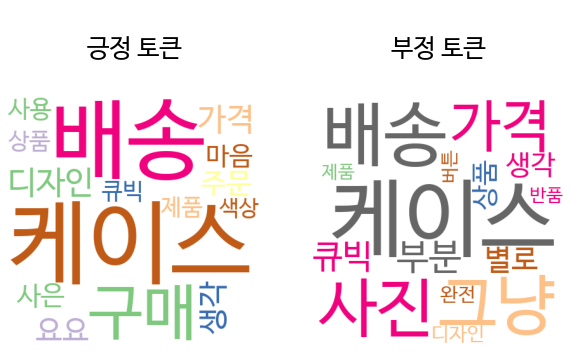

In [34]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 400,
    height = 400
)

p_tokens = dict(counter_p.most_common(15)) 
n_tokens = dict(counter_n.most_common(15))

fig = plt.figure(figsize=(10, 10))

axis1 = fig.add_subplot(1, 2, 1)
positive_words = wordcloud.generate_from_frequencies(p_tokens)
plt.gca().imshow(positive_words)
plt.gca().set_title('\n긍정 토큰\n', fontsize = 25)
plt.gca().axis('off')

axis2 = fig.add_subplot(1, 2, 2)
negative_words = wordcloud.generate_from_frequencies(n_tokens)
plt.gca().imshow(negative_words)
plt.gca().set_title('\n부정 토큰\n', fontsize = 25)
plt.gca().axis('off')

# 4.전처리 결과를 이용하여 로지스틱 회귀분석 또는 딥러닝에 의한 분류분석을 하고 해당 코딩과 결과에 대하여 설명하세요. 

- **로지스틱 회귀분석 선정이유**: 크롤링한 리뷰수가 딥러닝 모델을 이용할만큼 많지가 않기 때문이다.

## 데이터 준비

In [35]:
# 긍정 및 부정평가 댓글 수 
df["y"].value_counts()

# 긍정과 부정이 언벨런스함

1    490
0    179
Name: y, dtype: int64

In [41]:
# data 로 종합 데이터 형성 
X = tf_idf
y=df['y']
data = pd.concat([y,pd.DataFrame(X)], axis=1)
data

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908
0,1,0.37058,0.475547,0.44725,0.37058,0.314853,0.44725,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.577638,0.47004,0.66738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.401566,0.377671,0.225023,0.301103,0.360718,0.347568,0.377671,0.401566,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.657382,0.368373,0.657382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,1,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,1,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,1,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,1,0.00000,0.000000,0.00000,0.00000,0.000000,

## Train and Test Data

In [ ]:
# 전체 데이터를 train 데이터 70%, test 데이터 30%로 분리
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(data, test_size = 0.3, random_state=256)
train_df.head()

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908
116,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.170025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.577638,0.47004,0.66738,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337,1,0.788636,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 로지스틱 회귀분석

In [ ]:
# 데이터 설정 맞추기 
x_train = train_df.drop(['y'], axis=1)
y_train = train_df['y']
x_test = test_df.drop(['y'], axis=1)
y_test = test_df['y']

In [ ]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# classification result for test set
a1 = accuracy_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 =recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a1 )
print('precision: %.2f' % p1)
print('recall: %.2f' % r1)
print('F1: %.2f' % f1)

# 해석: recall은 99퍼센트 

accuracy: 0.71
precision: 0.71
recall: 0.99
F1: 0.83


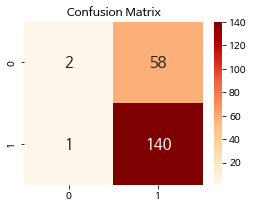

In [ ]:
# confusion matrix, 데이터 불균형에 의한 과적합 
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

# 우리는 감정분석을 할때, 회사상품의 리뷰를 본다면
# 부정적인 댓글에 더 관심을 가져야한다. 또 다른 예시론
# 병원에서 암환자와 암환자가 아닌 사람을 판단할때, 암 환자가 아닌 사람보다는
# 암에 걸린사람을 우리가 잘못판단해서 암에 걸리지 않았다는 위험을 감수하기 쉽다.
# 따라서 더 적은 데이터를 정확하게 분석하고 싶은 분류분석을 해야한다. 

# 아래의 결과처럼 부정적 평가가 모두 긍정으로 평가되는 경우, 이것은 더 심각한 문제이다.
# 따라서 위에서 recall이 99퍼센트가 나온것은 문제가 있는것이다.

In [ ]:
#그래서 재조정이 필요하다. sampling 재조정
df['y'].value_counts()

1    490
0    179
Name: y, dtype: int64

In [ ]:
# 적은수의 데이터 만큼만 긍정댓글을 입력하도록 조정
# under-sampling 방법으로 불균현 해소 즉, 490개의 데이터중에 179개 데이터만쓰고 나머지는 버린다.
# 데이터를 버리는것에 대한 부정적인 측면은 분명 있지만, 우리는 부정적댓글에 더 관심을 갖고
# 있기 때문에 균형을 맞춰서 분석을 해줘야 다른 데이터가 왔을때 적절한 퍼포먼스를 이룰수
# 있기 때문에 조정을 해야한다.

# random_state를 0~20을 다 넣어봤지만, 3으로 정해줬을때 
# 가장 정확도가 높았고, 컨퓨전 메트릭스 시각화시에 긍정인것은 긍정
# 부정인것은 부정으로 가장 이상적인 결과를 내놓았다.
# 따라서 random_state = 3으로 지정하였다.

positive_random_idx = df[df['y']==1].sample(179, random_state=3).index.tolist()
negative_random_idx = df[df['y']==0].sample(179, random_state=3).index.tolist()



In [ ]:

random_idx = positive_random_idx + negative_random_idx
x = tf_idf[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
x_train.shape, y_train.shape

((268, 909), (268,))

In [ ]:
x_test.shape, y_test.shape

((90, 909), (90,))

In [ ]:

lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
# classification result for test set
a2 = accuracy_score(y_test, y_pred)
p2 = precision_score(y_test, y_pred)
r2 =recall_score(y_test, y_pred)
f2= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a2 )
print('precision: %.2f' % p2)
print('recall: %.2f' % r2)
print('F1: %.2f' % f2)

accuracy: 0.68
precision: 0.68
recall: 0.67
F1: 0.67


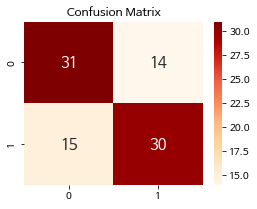

In [ ]:
# 개선된 confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

# 부정댓글을 부정으로, 긍정댓글을 긍정으로 아까보다는 상당히 잘 분류되어 개선된것을 알 수 있다.

In [ ]:
# 분류 정확도 test_result 
pd.options.display.float_format = '{:.2f}'.format
tr1 = pd.DataFrame([a1,p1,r1,f1])
tr2 = pd.DataFrame([a2,p2,r2,f2])

test_result = pd.concat([tr1.T, tr2.T], axis=0)
test_result.columns=['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1']
test_result.index = ['1차 Imbalance Data', '2차 Under-sampling']
test_result

# 이러한 분류를할때는 데이터의 불균형에 대한 문제를 반드시 고려해야한다.

,Accuracy(정확도),Precision(정밀도),Recall(재현율),F1
1차 Imbalance Data,0.71,0.71,0.99,0.83
2차 Under-sampling,0.68,0.68,0.67,0.67


## 긍정 / 부정 키워드 분석

In [ ]:
# 긍정/부정 키워드 추출 긍 / 부정 키워드를 추출 coeficient를 시각화
lr2.coef_

array([[-1.23859759e-01,  0.00000000e+00,  0.00000000e+00,
        -6.38733232e-02,  1.85992256e-01,  0.00000000e+00,
         0.00000000e+00,  1.16951975e-01,  0.00000000e+00,
        -1.91520301e-01, -1.80124159e-01,  1.02809948e+00,
         1.95795666e-01, -1.72038467e-01, -1.65766718e-01,
        -1.80124159e-01, -1.91520301e-01,  0.00000000e+00,
         3.51144697e-01,  0.00000000e+00, -1.84001194e-01,
         3.59391329e-01, -1.26607110e-01,  0.00000000e+00,
         1.25233736e-01,  0.00000000e+00, -8.56715492e-02,
         1.29888564e-01, -1.03124342e-01,  0.00000000e+00,
         0.00000000e+00, -1.41104362e-01, -8.60543917e-02,
         6.37778324e-01, -2.47677109e-01,  0.00000000e+00,
        -8.04787979e-02, -6.76048633e-01,  0.00000000e+00,
         0.00000000e+00, -1.46077557e-01, -1.49631136e-01,
        -9.35179401e-02, -8.81318253e-02,  9.84032046e-02,
        -3.03000318e-01,  0.00000000e+00,  2.33281394e-01,
         0.00000000e+00,  3.98881936e-01,  0.00000000e+0

<BarContainer object of 909 artists>

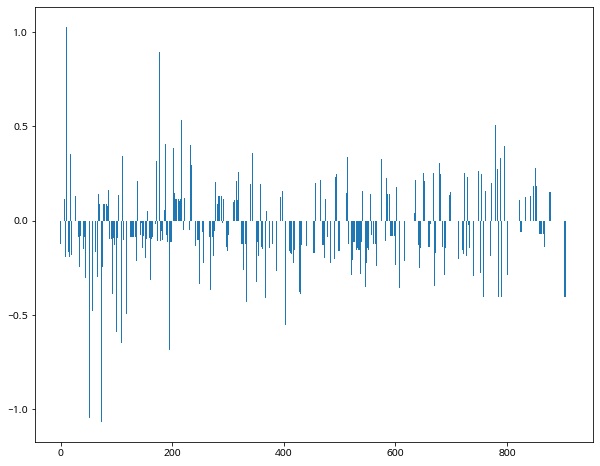

In [ ]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

# 해석: 0번부터 800개가 넘는 단어가 순서대로 나온 그래프임
# 위,아래로 많이 뻗은 데이터가 기여를 많이한다는 의미임.

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(1.0280994797336105, 11), (0.9029471337369884, 343), (0.8915918812347148, 177), (0.6936143020991431, 458), (0.6377783236032937, 33)]
[(-0.6837155666360385, 195), (-0.7386120012920221, 130), (-0.9429893069370635, 78), (-1.044704021811594, 52), (-1.0679619701080292, 73)]


In [ ]:
# 일부 중요 원소들 단어사전 확인
print('긍정리뷰 키워드: ', id_to_word[11],id_to_word[343]) 
print('부정리뷰 키워드: ', id_to_word[195],id_to_word[130]) 

# 긍정에선 구매, 선물이 부정에선 별로 오늘이 중요한 키워드로 인식이 되었다.

긍정리뷰 키워드:  구매 선물
부정리뷰 키워드:  별로 오늘


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.0280994797336105, 11),
 (0.9029471337369884, 343),
 (0.8915918812347148, 177),
 (0.6936143020991431, 458),
 (0.6377783236032937, 33),
 (0.5318610810906808, 217),
 (0.5065695361247673, 779),
 (0.4657837202571925, 169),
 (0.452529283839386, 205),
 (0.4269796003922772, 279),
 (0.42566115677181926, 465),
 (0.40997611609922785, 542),
 (0.40607161541814496, 188),
 (0.39995238100795155, 233),
 (0.39888193605648775, 49),
 (0.39590155446264114, 795),
 (0.39590155446264114, 759),
 (0.38650284508196625, 202),
 (0.38355189100655607, 65),
 (0.3606442687180023, 344),
 (0.35939132942890684, 21),
 (0.35114469738469484, 18),
 (0.3444329433938404, 111),
 (0.33974406640727356, 400),
 (0.33712830857380754, 514),
 (0.3301432996297472, 788),
 (0.327700740487904, 575),
 (0.3264220166082971, 175),
 (0.3172050705610452, 80),
 (0.3169833988342107, 172),
 (0.3166190095509696, 76),
 (0.31458809312454994, 533),
 (0.31217364910821555, 787),
 (0.30719352795442756, 679),
 (0.2944722580151775, 235),
 (0.2799446738

In [ ]:
#  index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 10 단어를 출력
invert_index_vectorizer = id_to_word

In [ ]:
pos_top_word=[] 
pos_top_score=[]
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    pos_top_word.append(invert_index_vectorizer[coef[1]])
    pos_top_score.append(coef[0])

# 긍정은 또 구매할거다, 선물하기 좋다, 사은품이 마음에 든다.. 등등등

구매 1.0280994797336105
선물 0.9029471337369884
사은 0.8915918812347148
아주 0.6936143020991431
배송 0.6377783236032937
벌써 0.5318610810906808
보이 0.5065695361247673
디자인 0.4657837202571925
골드 0.452529283839386
서비스 0.4269796003922772


In [ ]:
neg_top_word=[] 
neg_top_score=[]

for coef in coef_neg_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    neg_top_word.append(invert_index_vectorizer[coef[1]])
    neg_top_score.append(coef[0])

# 부정은 그냥그렇다, 사진보다 별로다, 부분적인 하자가 있다.. 등등등

그냥 -1.0679619701080292
사진 -1.044704021811594
부분 -0.9429893069370635
오늘 -0.7386120012920221
별로 -0.6837155666360385
완전 -0.6760486333563345
테두리 -0.6510029176153438
교환 -0.6498531072606497
이뽀 -0.5901947128767056
추석 -0.58983057379212


# 5.위에서 분석한 결과를 Matplotlib 등으로 시각화하여 보여주고 설명하세요.

## 막대도표 시각화

In [ ]:
pos_top_word.reverse()
pos_top_score.reverse()
top_word=neg_top_word+ pos_top_word
top_score = neg_top_score+ pos_top_score

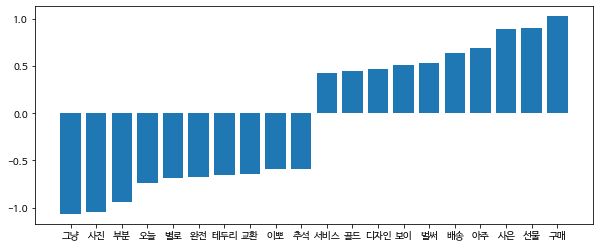

In [ ]:
plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결

plt.bar(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.bar(pos_top_word, pos_top_score, label = "긍정", color = 'g')

plt.bar(range(len(top_score)), top_score)
plt.xticks(range(len(top_word)), top_word)
plt.show()


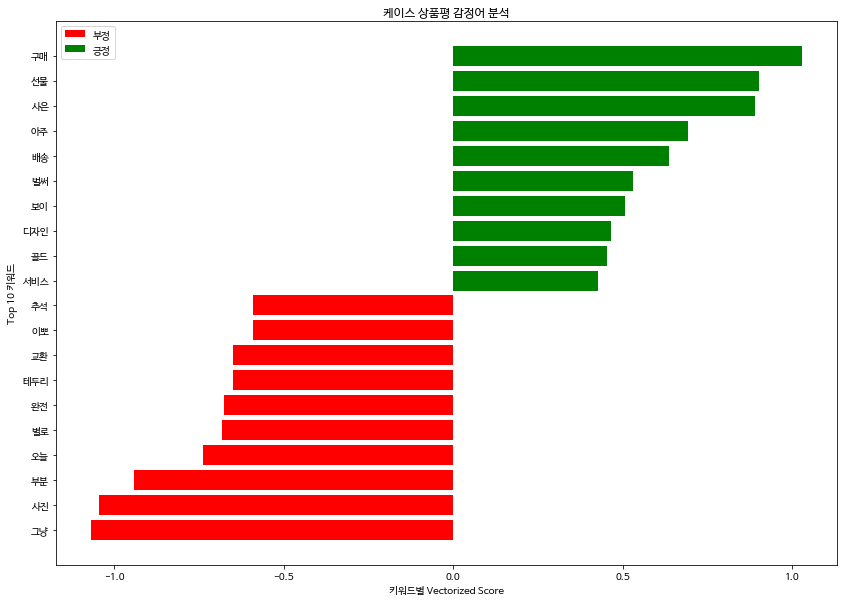

In [ ]:
# 감정분석 결과 시각화 
import matplotlib.pyplot as plt
plt.figure(figsize=[14, 10])
plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'g')
plt.legend()
plt.xlabel('키워드별 Vectorized Score')
plt.ylabel('Top 10 키워드')
# Giving the tilte for the plot
plt.title('케이스 상품평 감정어 분석')
# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

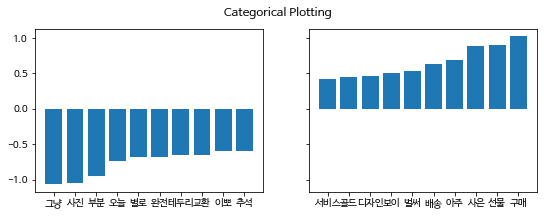

In [ ]:
# 약간 다르게 시각화 
import matplotlib.pyplot as plt

# data1 = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
# names1 = list(data1.keys())
# values1 = list(data1.values())

# data2 = {'apple': 1, 'orange': 5, 'lemon': 15, 'lime': 25}
# names2 = list(data2.keys())
# values2 = list(data2.values())

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].bar(neg_top_word, neg_top_score)
axs[1].bar(pos_top_word, pos_top_score)
fig.suptitle('Categorical Plotting')

## 트리맵 시각화

In [ ]:
neg_top_score

[-1.0679619701080292,
 -1.044704021811594,
 -0.9429893069370635,
 -0.7386120012920221,
 -0.6837155666360385,
 -0.6760486333563345,
 -0.6510029176153438,
 -0.6498531072606497,
 -0.5901947128767056,
 -0.58983057379212]

In [ ]:
!pip install squarify

In [ ]:
import squarify
import missingno as miss
import matplotlib.pyplot as plt

%matplotlib inline

df_p = pd.DataFrame()
df_p["Score"] = pos_top_score
df_p["Word"] = pos_top_word

df_n = pd.DataFrame()
df_n["Score"] = neg_top_score
df_n["Word"] = neg_top_word

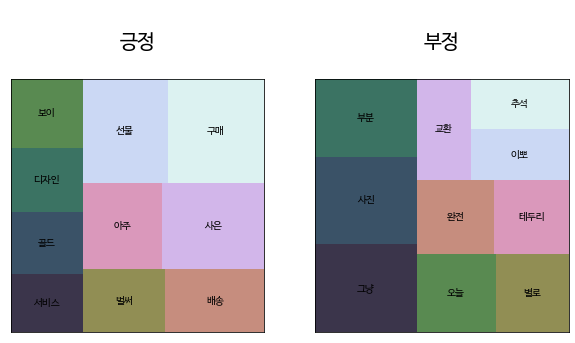

In [ ]:
# 트리맵 시각화한것

fig = plt.figure(figsize=(25, 25))

ax1 = fig.add_subplot(1, 2, 1, aspect="equal")
ax1= squarify.plot(sizes=df_p["Score"],label=df_p["Word"],
              color=sns.color_palette('cubehelix', 10), alpha=0.85)
ax1.set_xticks([])
ax1.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(10,20)
plt.title("\n긍정\n", fontsize = 20)

ax2 = fig.add_subplot(1, 2, 2, aspect="equal")
ax2 = squarify.plot(sizes=df_n["Score"],label=df_n["Word"],
              color=sns.color_palette('cubehelix', 10), alpha=0.85)
ax2.set_xticks([])
ax2.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(10,20)
plt.title("\n부정\n", fontsize = 20)

plt.show();

# 스코어 점수가 '-'로 갈수록 어두운 색을 뛰며, 스코어가 '+'로 큰 값일수록 밝은 색을 띈다.